<a href="https://colab.research.google.com/github/moses-irudayaraj/OIBSIP/blob/main/Task4_spamSMS_OR_E-MailDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imporing essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# to read the file
df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:

# Select rows where the 'Unnamed: 2' column is not null (contains values)
df[df['Unnamed: 2'].isnull() == False]


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [6]:
# Select rows where the 'Unnamed: 3' column is not null (contains values)
df[df['Unnamed: 3'].isnull() == False]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,SHE SHUDVETOLD U. DID URGRAN KNOW?NEWAY,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [7]:
# Select rows where the 'Unnamed: 4' column is not null (contains values)
df[df['Unnamed: 4'].isnull() == False]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


As the values of un-named column-2,3,4 are very less in number, we can drop them

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# selecting the required columns
df_cln = df[['v1','v2']]

In [10]:
df_cln

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df_cln.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
# to drop duplicate values
df_cln = df_cln.drop_duplicates()

In [13]:
df_cln.shape

(5169, 2)

In [16]:
# to know no. of values in class spam
(df_cln['v1'] == 'spam').sum()

653

In [18]:
# to know no. of values in class ham (not spam)
(df_cln['v1'] == 'ham').sum()

4516

In [19]:
# converting the two classes to numeric
df_cln['v1'] = df_cln['v1'].map({'ham': 0, 'spam': 1})

<ipython-input-19-9cd983e8929b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['v1'] = df_cln['v1'].map({'ham': 0, 'spam': 1})


In [20]:
df_cln

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


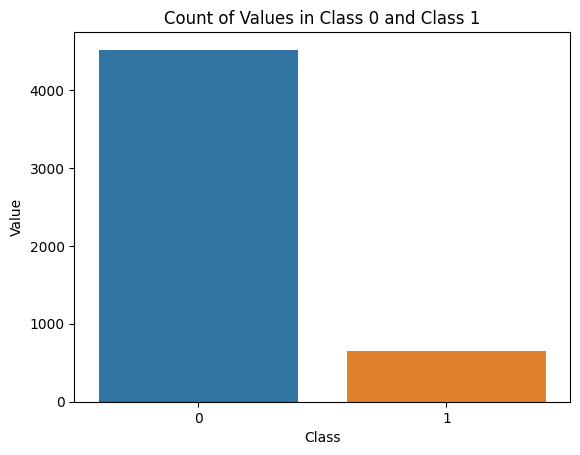

In [33]:
# to dispaly the no. of values in Class 0(ham) Class 1(spam)

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=df_cln['v1'].value_counts().index, y=df_cln['v1'].value_counts().values)
plt.title('Count of Values in Class 0 and Class 1')
plt.xlabel('Class')
plt.ylabel('Value')
plt.show()

Sms of type 'spam' is very less than the sms of type 'ham'. So, we need to balance it

In [41]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_cln['v2'], df_cln['v1'], test_size=0.3, random_state=3)


In [42]:
print(X_train.shape)
print(X_test.shape)

(3618,)
(1551,)


In [43]:
# to convert the text data to numeric data
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_tfidf = feature_extraction.fit_transform(X_train)
X_test_tfidf = feature_extraction.transform(X_test)

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [45]:
pd.Series(y_train_resampled).value_counts()

0    3182
1    3182
Name: v1, dtype: int64

Text(0, 0.5, 'Count')

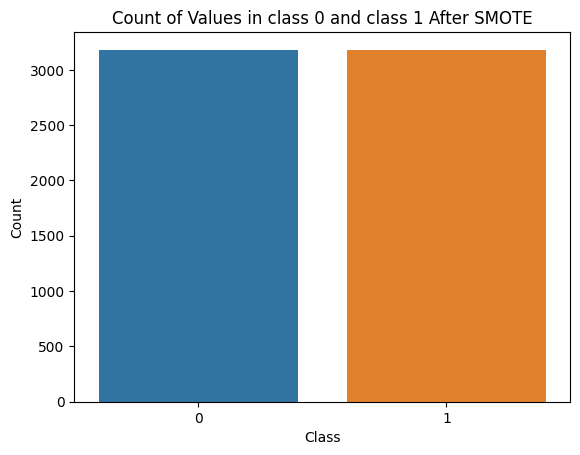

In [46]:
sns.barplot(x= pd.Series(y_train_resampled).value_counts().index, y= pd.Series(y_train_resampled).value_counts().values)
plt.title("Count of Values in class 0 and class 1 After SMOTE", fontsize=12)
plt.xlabel("Class")
plt.ylabel("Count")



# Model Creation, Training and Testing

In [30]:
# importing essential libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [54]:

# Define and test multiple models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine (SVM)': SVC(),
    'Logistic Regression': LogisticRegression()

}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

Model: Multinomial Naive Bayes
Accuracy: 0.9607
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1334
        spam       1.00      0.72      0.84       217

    accuracy                           0.96      1551
   macro avg       0.98      0.86      0.91      1551
weighted avg       0.96      0.96      0.96      1551



Model: Support Vector Machine (SVM)
Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1334
        spam       0.98      0.80      0.88       217

    accuracy                           0.97      1551
   macro avg       0.98      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551



Model: Logistic Regression
Accuracy: 0.9484
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1334
        spam       

# Trying it in Real Scenario

In [62]:
res = model.predict(feature_extraction.transform([input("Paste the mail/sms: ")]))
if res[0] == 1:
  print("Ham Mail/SMS")
else:
  print("Spam Mail/SMS")

Paste the mail/sms: You've successfully unsubscribed from noc23-cs85-discuss .  In addition, we have unsubscribed you from at least one topic of the group noc23-cs85-discuss.
Spam Mail/SMS
